In [18]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
sns.set_theme()
color_list = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [19]:
def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(2, 3):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, ax):
    ax = ax
    labels = gmm.fit(X).predict(X)
    sns.scatterplot(X[:, 0], X[:, 1], hue=labels, ax= ax, s=40, palette='deep', legend= False, alpha=0.5)


    i = 0
    for pos, covar in zip(gmm.means_, gmm.covariances_):
        draw_ellipse(pos, covar, ax= ax, edgecolor = color_list[i], facecolor= 'none', alpha= 1)
        i += 1

def plot_score(X):
    n_components = np.arange(2, 15)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]
    fig, ax = plt.subplots( 1,2, figsize=(20, 4))
    ax[0].plot(n_components, [ np.sum( np.min( cdist(X, m.means_), axis=1 ) / X.shape[0]) for m in models])
    ax[0].set_xlabel('n_components')
    ax[0].set_title('Elbow Method')
    ax[0].set_xticks(n_components, labels= n_components)

    ax[1].plot(n_components, [silhouette_score(X,m.predict(X)) for m in models])
    ax[1].set_xlabel('n_components')
    ax[1].set_title('Silhouette Score')
    ax[1].set_xticks(n_components, labels= n_components)

def plot_kmeans(kmeans, X ,ax):
    label = kmeans.fit_predict(X)
    sns.scatterplot(X[:, 0] , X[:, 1] , hue= label, ax= ax,palette='deep', legend= False, alpha= 0.5)

    for point in kmeans.cluster_centers_:
        ax.plot(point[0], point[1], '*',markersize=20)

def elbow_report(X):
    meandist = []
    n_clusters = range(2,15)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        meandist.append(
          sum(
            np.min(
              cdist(X, gmm.means_, 'mahalanobis', VI=gmm.precisions_),
              axis=1
            ),
            X.shape[0]
          )
        )
    plt.plot(n_clusters,meandist,'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Mean Mahalanobis Distance')
    plt.title('GMM Clustering for n_cluster=2 to 15')
    plt.show()


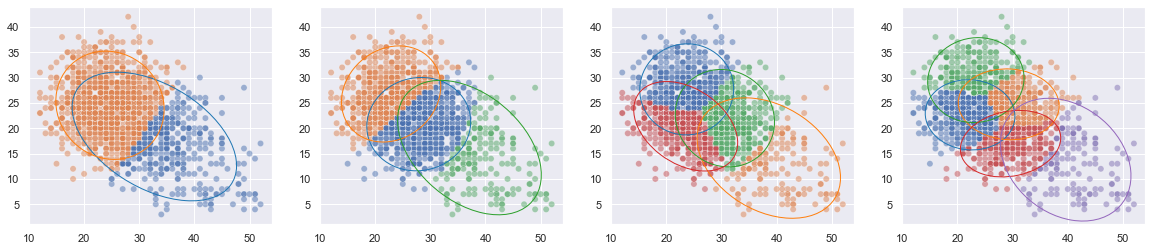

In [20]:
K = [2, 3, 4, 5]

X, y = datasets.make_multilabel_classification(n_samples=1500, n_features=2, random_state=0)

fig, ax = plt.subplots( 1,4, figsize=(20, 4))
for i, K in enumerate(K):
    k = GaussianMixture(K)
    plot_gmm(k, X, ax[i])

plt.show()

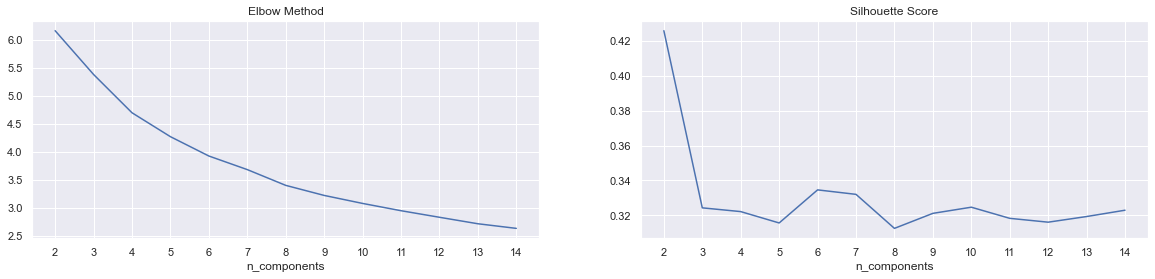

In [21]:
plot_score(X)

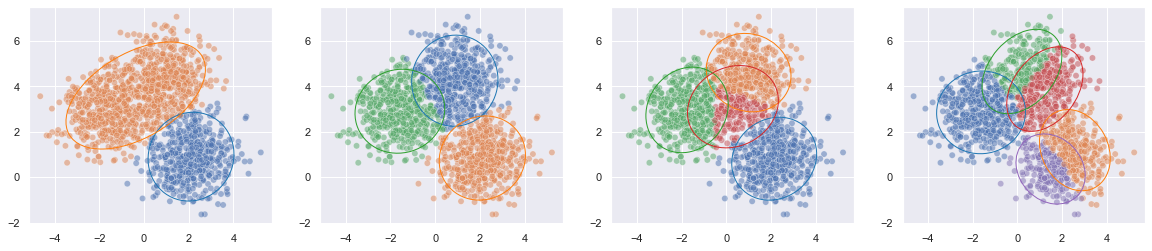

In [22]:
K = [2, 3, 4, 5]

X, y = datasets.make_blobs(n_samples=1500, n_features=2, random_state=0)

fig, ax = plt.subplots( 1,4, figsize=(20, 4))
for i, K in enumerate(K):
    k = GaussianMixture(K)
    plot_gmm(k, X, ax[i])

plt.show()

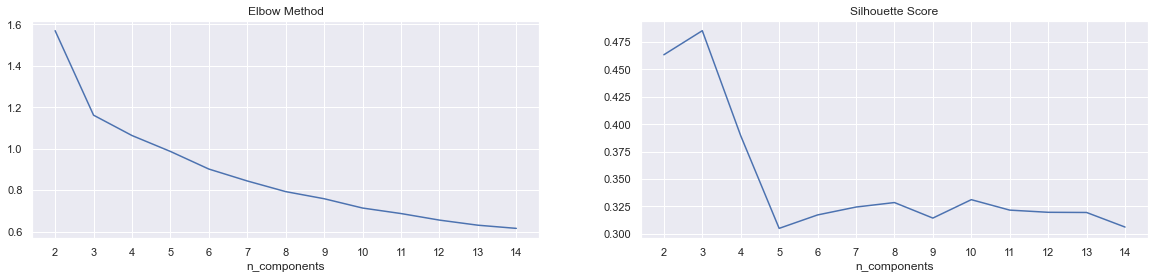

In [23]:
plot_score(X)

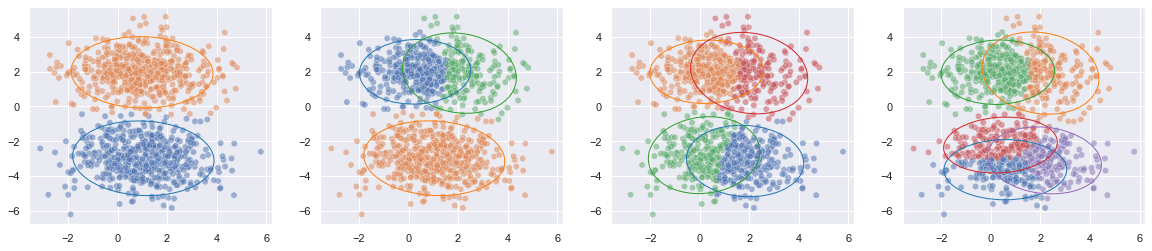

In [24]:
cov = [[2,0],[0,1]]
x_1, y_1 = np.random.multivariate_normal((1,2), cov, 500).T
x_2, y_2 = np.random.multivariate_normal((1,-3), cov, 500).T
X_1 = np.array([x_1,y_1]).T
X_2 = np.array([x_2,y_2]).T
X = np.vstack((X_1,X_2))

K = [2, 3, 4, 5]

fig, ax = plt.subplots( 1,4, figsize=(20, 4))
for i, K in enumerate(K):
    k = GaussianMixture(K)
    plot_gmm(k, X, ax[i])

plt.show()

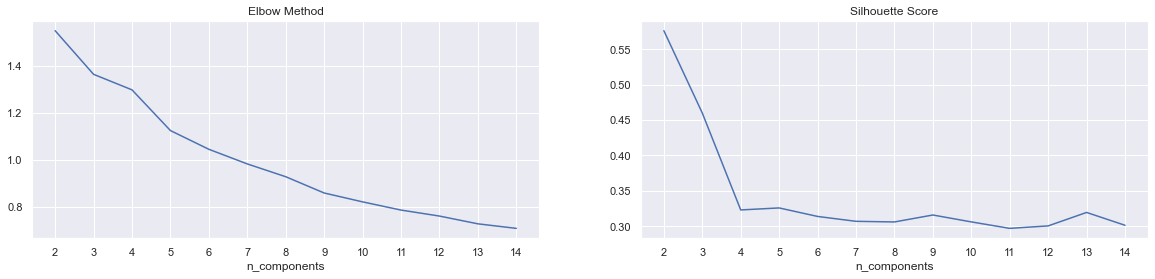

In [25]:
plot_score(X)

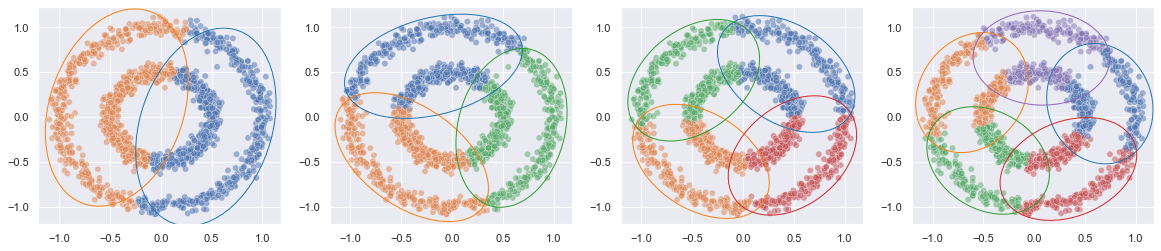

In [26]:
K = [2, 3, 4, 5]

X, y = datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=0)

fig, ax = plt.subplots( 1,4, figsize=(20, 4))
for i, K in enumerate(K):
    k = GaussianMixture(K)
    plot_gmm(k, X, ax[i])

plt.show()

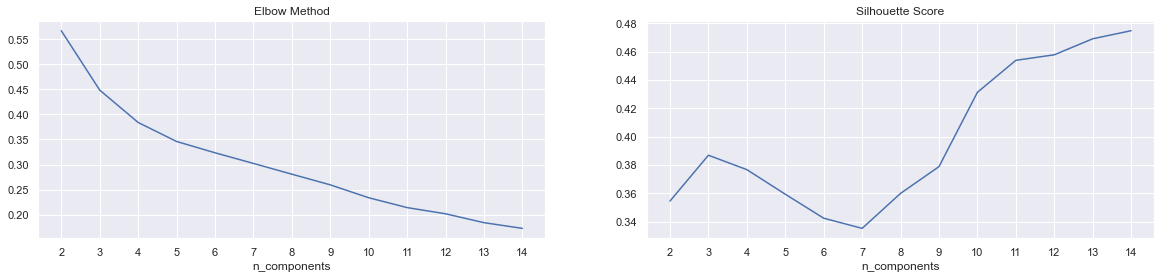

In [27]:
plot_score(X)

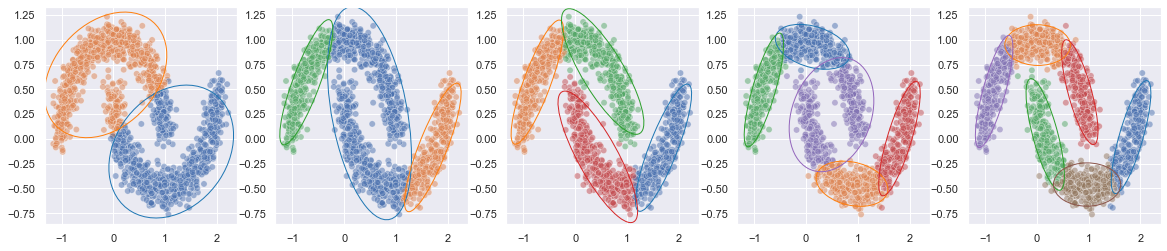

In [28]:
K = [2, 3, 4, 5, 6]
X, y = datasets.make_moons(1500, noise=.1, random_state=0)

fig, ax = plt.subplots( 1,5, figsize=(20, 4))
for i, K in enumerate(K):
    k = GaussianMixture(K)
    plot_gmm(k, X, ax[i])

plt.show()

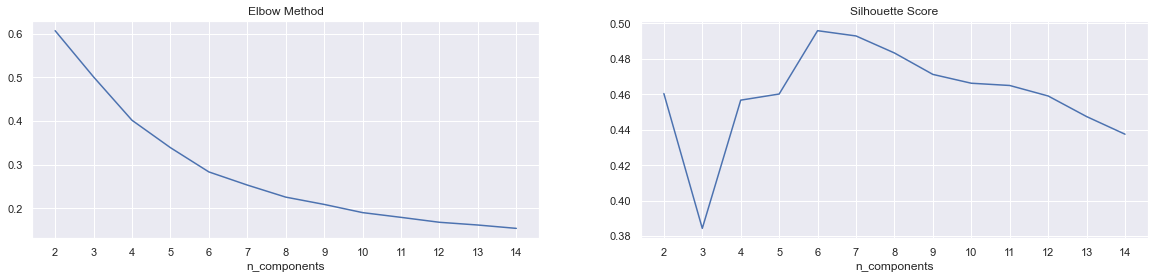

In [29]:
plot_score(X)

## Compare K-means and GMM

|                                                                                    | Kmeans                                          | GMM                                               |
|------------------------------------------------------------------------------------|-------------------------------------------------|---------------------------------------------------|
| Advantages                                                                         | Relatively simple to implement                  | Probabilistic estimates of belonging to each cluster |
|| Comparatively fast                                                                 | Does not assume spherical clusters              |
|| Scales to large data sets                                                          | Handles clusters of differing sizes             |
|| Guarantees convergence                                                             | Less sensitive to scale                         |
|| Can warm-start the positions of centroids                                          |                                                 |
|| Easily adapts to new examples                                                      |                                                 |
|| Generalizes to clusters of different shapes and sizes, such as elliptical clusters |                                                 |
| Disadvantages                                                                      | Choosing k manually                             |    Assumes a normal distribution for features  |
|| Dependent on initial values                                                        | Needs to choose specific number of cluster      |
|| Sensitive to outliers                                                              | Needs sufficient data for each cluster          |
|| Assumes spherical density                                                          | Somewhat sensitive towards outliers             |
|| Algorithm will converge but it might not be a global minimum                       | Somewhat sensitive to initialization conditions |
||                                                                                    | Difficult to incorporate categorical features   |
||                                                                                    | Somewhat slow                                   |

## Some example GMM better than K-means

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


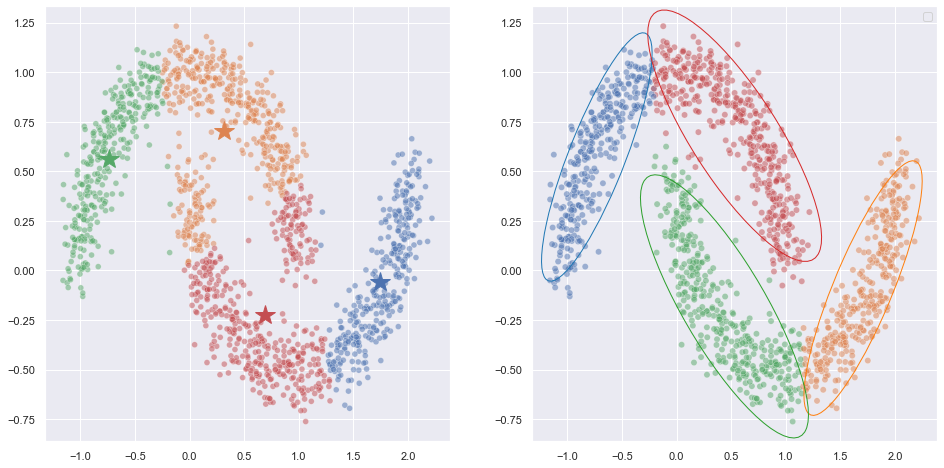

In [30]:
X, y = datasets.make_moons(1500, noise=.1, random_state=0)

fig, ax = plt.subplots( 1,2 ,figsize=(16, 8))

kmeans = KMeans(n_clusters= 4)
plot_kmeans(kmeans, X, ax[0])

k = GaussianMixture(4)
plot_gmm(k, X, ax[1])

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


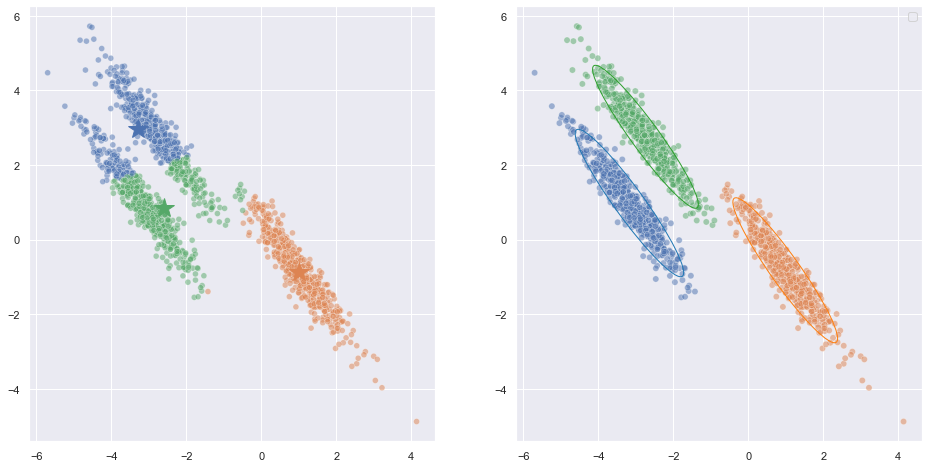

In [31]:
X, y = datasets.make_blobs(n_samples=1500, random_state= 170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

fig, ax = plt.subplots( 1,2 ,figsize=(16, 8))

kmeans = KMeans(n_clusters= 3)
plot_kmeans(kmeans, X, ax[0])

k = GaussianMixture(3)
plot_gmm(k, X, ax[1])

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


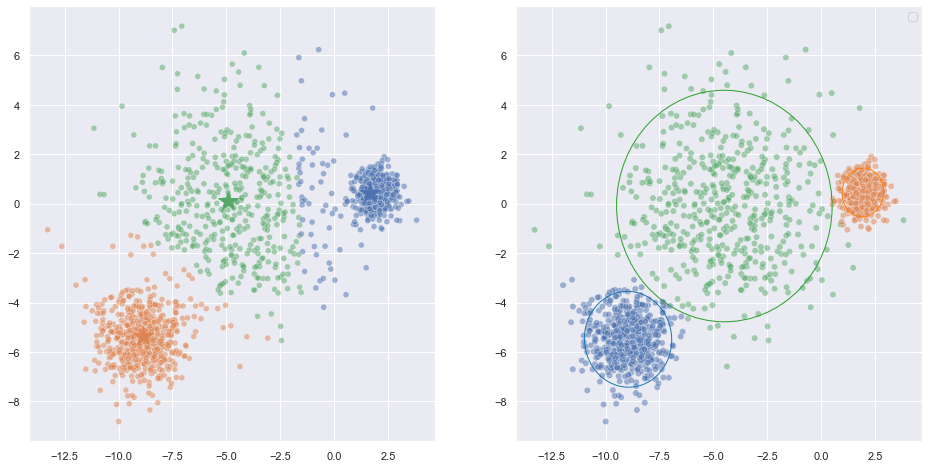

In [32]:
X, y = datasets.make_blobs(n_samples=1500, cluster_std=[1.0, 2.5, 0.5], random_state=170)

fig, ax = plt.subplots(1, 2,figsize=(16, 8))

kmeans = KMeans(3)
plot_kmeans(kmeans, X, ax[0])

k = GaussianMixture(3)
plot_gmm(k, X, ax[1])

plt.legend()
plt.show()